#instalando pacotes necessarios

In [ ]:
pip install geopandas

     |████████████████████████████████| 994 kB 4.9 MB/s 
     |████████████████████████████████| 15.4 MB 36 kB/s 
     |████████████████████████████████| 6.6 MB 27.8 MB/s 


In [ ]:
pip install hvplot

     |████████████████████████████████| 3.1 MB 5.0 MB/s 


In [ ]:
pip install geoviews

     |████████████████████████████████| 502 kB 5.1 MB/s 
     |████████████████████████████████| 12.1 MB 145 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 219 kB 48.6 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516270 sha256=29f3dbc9d14216caa2396dc51c753c94cf40efa543383c7a15df53c57d2d9c89
  Stored in directory: /root/.cache/pip/wheels/98/01/f7/bd10aeb96fe4b518cde5f7c4f5e12c7202f85b7353a5017847
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=d08327abfe1dfdd3570d203626aa7d6f9175ac993ec52def6eaf91bfbec6dba0
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built cartopy pyshp


In [ ]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from openpyxl import load_workbook
import matplotlib
import fiona
import hvplot.pandas
import holoviews as hv

Metas de segurança do Estado Da Bahia por território de Identidade


In [ ]:
terrba=gpd.read_file('/content/REG_TI_MUN_A_100K_2019_05_14_GCS_SIR_SEI.zip')#territorios shp
terrba['NM_TI']=terrba['NM_TI'].str.upper()
terrba['NM_TI']

0                              IRECÊ
1                        VELHO CHICO
2                 CHAPADA DIAMANTINA
3                              SISAL
4                        LITORAL SUL
5                          BAIXO SUL
6                        EXTREMO SUL
7            MÉDIO SUDOESTE DA BAHIA
8                  VALE DO JIQUIRIÇÁ
9            SERTÃO DO SÃO FRANCISCO
10               BACIA DO RIO GRANDE
11                BACIA DO PARAMIRIM
12                  SERTÃO PRODUTIVO
13             PIEMONTE DO PARAGUAÇU
14                  BACIA DO JACUÍPE
15            PIEMONTE DA DIAMANTINA
16             SEMIÁRIDO NORDESTE II
17    LITORAL NORTE E AGRESTE BAIANO
18                  PORTAL DO SERTÃO
19                   SUDOESTE BAIANO
20                         RECÔNCAVO
21               MÉDIO RIO DE CONTAS
22             BACIA DO RIO CORRENTE
23                         ITAPARICA
24       PIEMONTE NORTE DO ITAPICURU
25         METROPOLITANO DE SALVADOR
26            COSTA DO DESCOBRIMENTO
N

In [ ]:
wb = load_workbook(filename='Painel PPA Mobile_CompromissoTodos.xlsx', 
                   read_only=True)

ws = wb['CompromissoTodos']

# Read the cell values into a list of lists
data_rows = []
for row in ws['A32':'B59']:
    data_cols = []
    for cell in row:
        data_cols.append(cell.value)
    data_rows.append(data_cols)

metas_seguranca = pd.DataFrame(data_rows)

new_header = metas_seguranca.iloc[0] #grab the first row for the header
metas_seguranca = metas_seguranca[1:] #take the data less the header row
metas_seguranca.columns = new_header #set the header row as the df header
metas_seguranca.iloc[25,0]='VALE DO JIQUIRIÇÁ'
metas_seguranca

,Território(s),Meta(s)
1,BACIA DO JACUÍPE,7
2,BACIA DO PARAMIRIM,6
3,BACIA DO RIO CORRENTE,6
4,BACIA DO RIO GRANDE,14
5,BAIXO SUL,10
6,CHAPADA DIAMANTINA,7
7,COSTA DO DESCOBRIMENTO,13
8,EXTREMO SUL,15
9,IRECÊ,12
10,ITAPARICA,9


Juntando spatial e data frame


In [ ]:
meta_seg=pd.merge(left=terrba, right=metas_seguranca, left_on='NM_TI', right_on='Território(s)')
meta_seg['Meta(s)']=pd.to_numeric(meta_seg['Meta(s)'])

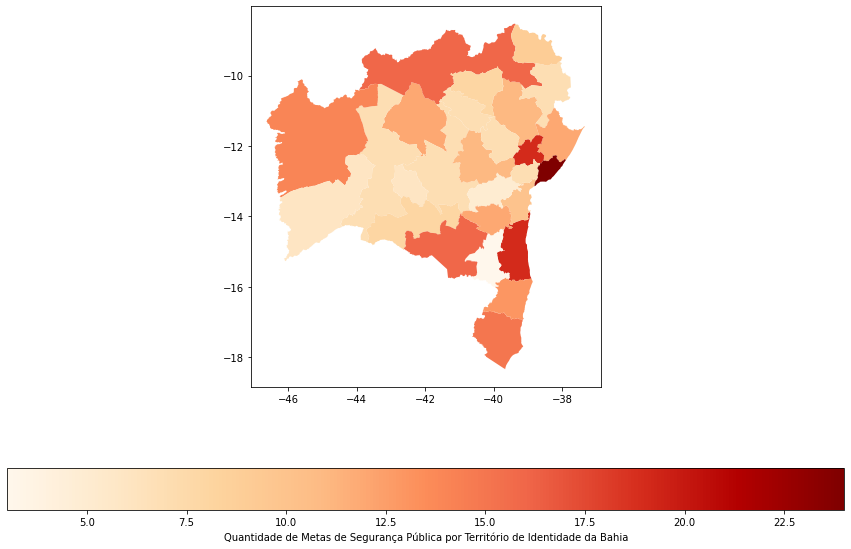

In [ ]:
meta_seg.plot(column='Meta(s)',legend=True,cmap="OrRd",figsize=(15, 10),legend_kwds={'label': "Quantidade de Metas de Segurança Pública por Território de Identidade da Bahia",
                    'orientation': "horizontal"})

Plot Interativo das Metas de Segurança por território de Identidade do Estado da Bahia

In [163]:
fig=meta_seg.hvplot(c='Meta(s)',hover_cols='Território(s)',
                             width=900,height=500,
                             line_color="Meta(s)",
                             cmap="YlOrRd",
                             hover_fill_color="white",
                             line_width=2,
                             title="Metas De Segurança Por Território de Identidade da Bahia")
hvplot.save(fig,"Metas_ Seguranca.html")

# Metas de Infraestrutura

In [166]:
wb = load_workbook(filename='/PPA_metas_infraestrutura.xlsx', 
                   read_only=True)

ws = wb['CompromissoTodos']

# Read the cell values into a list of lists
data_rows = []
for row in ws['A28':'B55']:
    data_cols = []
    for cell in row:
        data_cols.append(cell.value)
    data_rows.append(data_cols)

metas_infra = pd.DataFrame(data_rows)

new_header = metas_infra.iloc[0] #grab the first row for the header
metas_infra = metas_infra[1:] #take the data less the header row
metas_infra.columns = new_header #set the header row as the df header
metas_infra.iloc[25,0]='VALE DO JIQUIRIÇÁ'
metas_infra

,Território(s),Meta(s)
1,BACIA DO JACUÍPE,5
2,BACIA DO PARAMIRIM,6
3,BACIA DO RIO CORRENTE,6
4,BACIA DO RIO GRANDE,8
5,BAIXO SUL,7
6,CHAPADA DIAMANTINA,9
7,COSTA DO DESCOBRIMENTO,8
8,EXTREMO SUL,9
9,IRECÊ,8
10,ITAPARICA,6


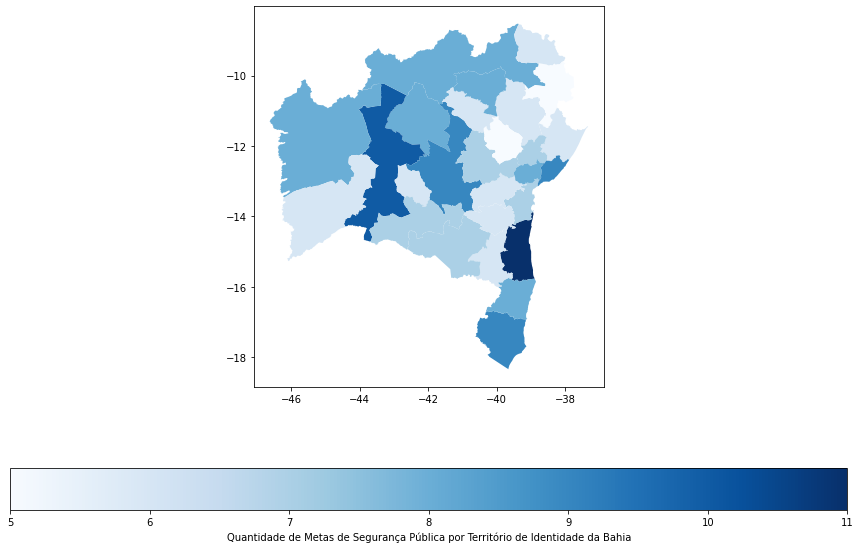

In [177]:
meta_inf=pd.merge(left=terrba, right=metas_infra, left_on='NM_TI', right_on='Território(s)')
meta_inf['Meta(s)']=pd.to_numeric(meta_inf['Meta(s)'])
meta_inf.plot(column='Meta(s)',legend=True,cmap="Blues",figsize=(15, 10),legend_kwds={'label': "Quantidade de Metas de Segurança Pública por Território de Identidade da Bahia",
                    'orientation': "horizontal"})

In [178]:
#plot interativo
fig=meta_inf.hvplot(c='Meta(s)',hover_cols='Território(s)',
                             width=900,height=500,
                             line_color="Meta(s)",
                             cmap="Blues",
                             hover_fill_color="white",
                             line_width=2,
                             title="Metas De Infraestrutura Por Território de Identidade da Bahia")
hvplot.save(fig,"Metas_ Infraestrutura.html")
